# Facebook Take Home Assignment

This take home assignment is designed to test your understanding on how to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

There are two approaches that we're going to learn to predict a movie status in this Take Home Assignment: 
- by using numerical and categorical features
- by using text data (review from the critics)

The dataset that we're going to use to apply each of the approaches above will be different. For the first approach, we're going to use `rotten_tomatoes_movies.csv` as our dataset. For the second approach, we're going to use `rotten_tomatoes_critic_reviews_50k.csv`

You can build a machine learning model with any algorithm, but in this task, we're going to focus our attention in predicting the movie status with tree-based algorithms, i.e Decision Tree Classifier and Random Forest algorithm. If you want to learn about the in-depth explanation about the learning process of Decision Tree and Random Forest algorithm, you can read it [here](https://www.stratascratch.com/blog/decision-tree-and-random-forest-algorithm-explained/).

To begin, let's import all of the libraries necessary for this assignment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## First Approach: Predicting Movie Status Based on Numerical and Categorical Features 

In this first approach, we're going to predict a movie status based on numerical and categorical features on our dataset. Our dataset for this first approach will be a CSV file called `rotten_tomatoes_movies.csv`, in which it contains information about movie title, its genre, actors, release date, production company, runtime, critics' rating, audience rating, and the tomatometer rating. Let's take a look at what our dataset looks like. 

In [3]:
df_movie = pd.read_csv('rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


As you can see, there are several columns available on our dataset:

- `rotten_tomatoes_link`: Rotten Tomatoes link of the corresponding movie
- `movie_title`: movie title
- `movie_info`: synopsis about what the movie is about
- `critics_consensus`: majority movie review of the corresponding movie
- `content_rating`: the rating of a movie suitability for certain audiences based on its content
- `genres`: genre of the movie
- `directors`: the director of the movie
- `authors`: the screenwriter of the movie
- `actors`: the main actors in the movie
- `original_release_date`: movie release date for cinema
- `streaming_release_data`: movie release date for streaming platforms
- `runtime`: movie runtime duration
- `production_company`: production house of the movie
- `tomatometer_status`: rotten tomatoes' movie classification (this is what we will try to predict in this assignment)
- `tomatometer_rating`: rotten tomatoes' numerical rating
- `tomatometer_count`: number of critic's review of a movie
- `audience_status`: movie classification from audience review
- `audience_rating`: movie's numerical rating from audience
- `audience_count`:number of audience's review of a movie
- `tomatometer_top_critics_count`: number of top critics reviewing a movie
- `tomatometer_fresh_critics_count`: number of top critics review labeled as 'fresh'
- `tomatometer_rotten_critics_count`: number of top critics review labeles as 'rotten'

To better understand our data a little bit better, let's take a look at the summary of our data.

In [3]:
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


### Data Preprocessing

As we can see from the summary of our data above, of all of the features, only `runtime`, `tomatometer_rating`, `tomatometer_count`, `audience_rating`, `audience_count`,`tomatometer_top_critics_count`, `tomatometer_fresh_critics_count`, and `tomatometer_rotten_critics_count` that can be classified as numerical features. We're going to use all of these features as predictors to predict our dependent variable, which is `tomatometer_status`. Notice that we have missing values in some of predictors as well, which we need to address later on.

But first, let's try to add some more features that might be beneficial to increase the prediction power of our tree-based algorithms. Let's start with `content_rating` variable, which is not necessarily a numerical feature, but more of a categorical feature, as it has a discrete value such as `R`, `PG`, `NR`, etc as you can see below.

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

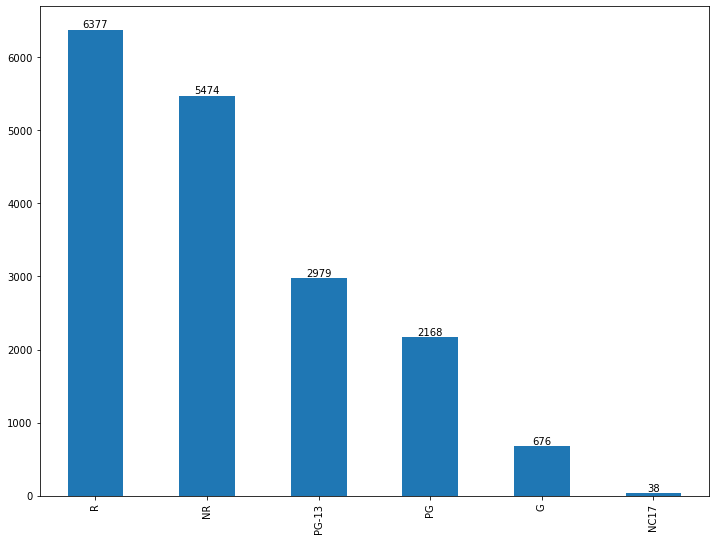

In [4]:
print(f'Content Rating category: {df_movie.content_rating.unique()}')

# Visualize the distribution of each category
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

Now if we have a categorical feature like `content_rating` above, we need to transform each category into its numerical representation. Remember that our machine learning algorithm can only learn if we supply the data in the form of number, not text or any other kind. There are two approaches how we can transform a category into its numerical representation: either with ordinal encoding or with one-hot encoding. We're going to use both approaches in this assignment for different features, as one approach would be preferred than another, depending on the case:

- **Ordinal encoding**: preferred if each category represents a degree of magnitude, for example 'poor': 0, 'average': 1, 'good': 2
- **One-hot encoding**: preferred if each category doesn't represent a degree of magnitude, for example 'black': [1,0,0], 'red': [0,1,0], 'blue': [0,0,1]

Since each category of our `content_rating` feature doesn't represent any degree of magnitude, then we can convert them with one-hot encoding,as you can see below:

In [5]:
content_rating = pd.get_dummies(df_movie.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Next, let's preprocess another feature that we can use as a predictor, which is `audience_status` variable. This variable consists of two categories: 'Spilled' and 'Upright'. As we already know, since each category represents an order of magnitude, then we need to convert it with ordinal encoding. So, let's do that.

Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

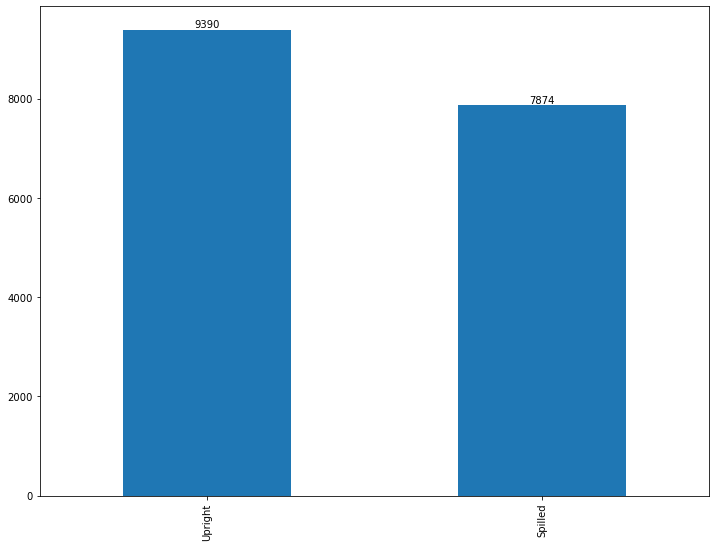

In [6]:
print(f'Audience status category: {df_movie.audience_status.unique()}')

# Visualize the distribution of each category
ax = df_movie.audience_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [7]:
# Encode audience status variable with ordinal encoding
audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


The final variable that we need to convert with encoding approach is our dependent variable, which is the `tomatometer_status`. As you already know, there are three unique categories in this variable: 'Rotten', 'Fresh', and 'Certified-Fresh'. Since each category has an order of magnitude, then we need to convert each category with ordinal encoding. 

In [8]:
# Encode tomatometer status variable with ordinal encoding
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


And that's all that we need to do. Next, let's combine all of the variables that we have converted with encoding approach with the rest of numerical features. To do this, we can use `pd.concat()` method with Pandas. Remember that we also have missing values here and there in each of the features. In this assignment, we will just simply remove the row if there is a missing value in any of the column.

In [9]:
df_feature = pd.concat([df_movie[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
                        , content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [10]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


As you can see above, now we have all of the features that we can use as predictors for our machine learning algorithms, as well as the dependent variable `tomatometer_status` in one dataframe. Notice that all of the variables now have 17017 entries after we drop any rows with a missing value in any of the columns. Next, let's see the distribution of our dependent variable`tomatometer_status`.

In [11]:
len(df_feature)

17017

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

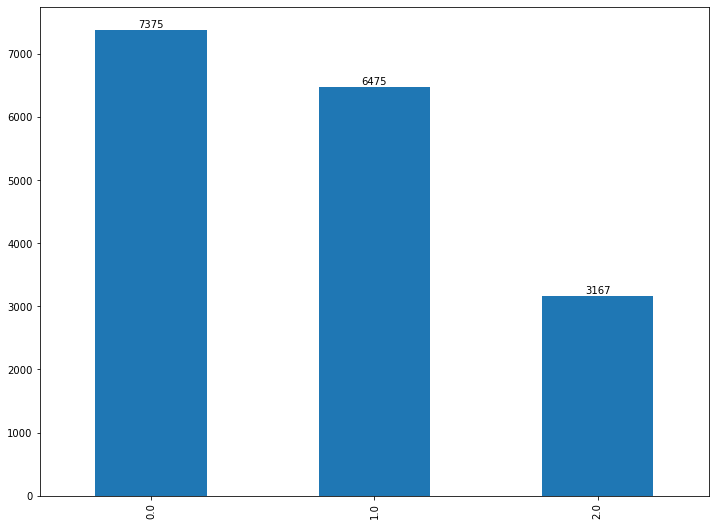

In [12]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

It turns out that in our final dataframe, we have 7375 movies classified as `Rotten`(encoded as 0), 6475 movies classified as 'Fresh' (encoded as 1), and only 3167 movies classified as 'Certified-Fresh' (encoded as 2). Thus, it looks like that we have a class imbalance problem in this case. We will deal with this later, but for starter, let's use our dataframe as it is and let's start splitting our data into training data and test data. The split would be 80%-20%.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


And that's all for data preprocessing part. Now we're ready to build our machine learning algorithm to predict the tomatometer status of a particular movie. Let's start with Decision Tree Classifier.

### Decision Tree Classifier

Decision Tree Classifier is a machine learning algorithm that we can use for both regression and classification purposes, although it is indeed more popular for classification purposes. As the name suggests, a Decision Tree Classifier classifies data points by creating branches, just like a tree in general. A Decision Tree Classifier creates bunch of branches which consist of interior nodes and leaf nodes:

- Interior nodes: consist of series of series of conditions that each of the data points need to fulfill
- Leaf nodes: consist of the prediction value of a Decision Tree Classifier

In each branch, the value of a data point will be assessed by the classifier with a boolean condition (i.e True/False) to determine which node it belongs to, until finally this data point reaches a leaf node. The illustration of a Decision Tree Classifier can be seen below:

![Imgur](https://i.imgur.com/5ug2Ty5.png)


There are some hyperparameters that we can tune when we use a Decision Tree Classifier, such as the maximum depth of the tree, maximum number of leaf nodes, etc.

As a first example, let's set the maximum number of leaf nodes to be 3, such that the tree wouldn't be to deep and the decision flow of the tree can be easier to understand.




0.9462397179788484
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



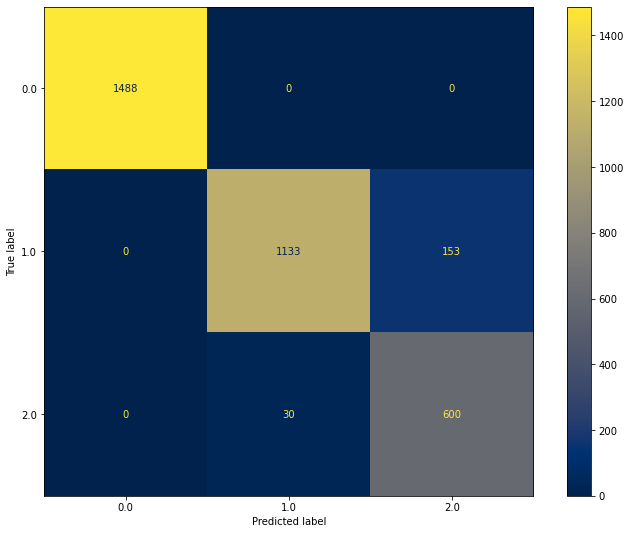

In [14]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree_3_leaf, X_test, y_test, cmap ='cividis', ax=ax)

As we can see from the accuracy report and confusion matrix above, our Decision Tree Classifier perform reasonably well considering we constrained the model with only three leaf nodes.The advantage of having only three leaf nodes is that the decision workflow of our classifier can be easily visualized and explained. To visualize the decision workflow of a Decision Tree Classifier, we can use `plot_tree` method from `sklearn.tree`.  

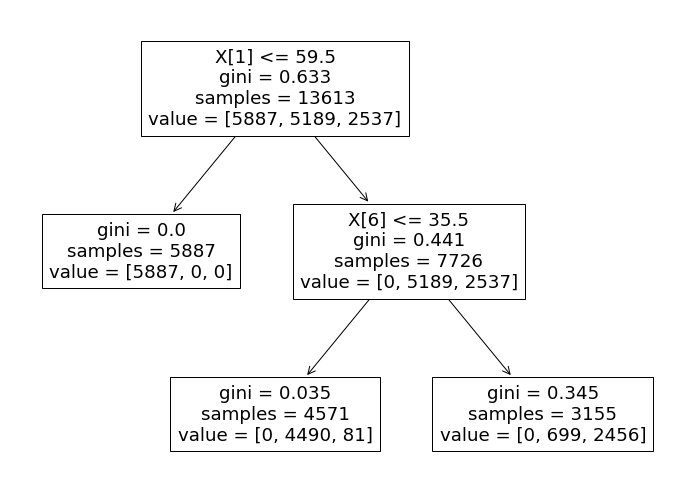

In [15]:
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax= ax)
plt.show()

The visualization above explains the logic of our decision tree classifier. If you take a look at our `df_feature` dataframe above, we can see that the feature that has an index 1 is `tomatometer_rating`. From the visualization above, it turns out that our decision tree classifier uses `tomatometer_rating` feature in the first branch to make a decision where it puts each test data point. Below is the explanation of the logic:

- If a data point has `tomatometer_rating` below or equals to 59.5, then that data point will be labeled as 0, which is the encoding representation of 'Rotten'. If not, then a data point goes to the next branch.
- In the second branch, our decision tree classifier uses the feature with index 6 in our `df_feature` dataframe, which is `tomatometer_fresh_critics_count` to classify the remaining data points. If a data point has `tomatometer_fresh_critics_count` less than or equal to 35.5, then it will be labeled as 1, which is the encoding representation of 'Fresh', otherwise it will be labeled as 2 or 'Certified-Fresh'.

The decision logic shown above is actually very similar with how Rotten Tomatoes assigns a status on a movie. Based on the rule stated in RottenTomatoes homepage, which you can see [here](https://www.rottentomatoes.com/about), the way they assign a movie status would be something like this:

- 'Fresh' status will be assigned to a movie if it receives at least 60% positive review, i.e a score of 60 or above in its `tomatometer_rating` variable.
- 'Rotten' status will be assigned to a movie if it receives less than 60% positive review, i.e a score below 60 in its `tomatometer_rating` variable.

From the visualization of our Decision Tree model above, we can see that if the `tomatometer_rating` of a movie is below 59.5, then it will be classified as 'Rotten', otherwise 'Fresh'. This means that the decision logic of our model closely resembles the rule-based method mentioned by Rotten Tomatoes.

If a movie has `tomatometer_rating` above 59.5, then the model needs to take a look at several features in order to find out whether a movie is 'Fresh' or 'Certified-Fresh'. If you take a look at the Rotten Tomatoes homepage, there are several considerations need to be taken into account for a movie to be considered as 'Certified-Fresh' instead of just 'Fresh', such as:

- A consistent Tomatometer score of at least 75%
- At least 5 reviews from Top Critics
- Films in wide release must have minimum of 80 reviews

As you can see, there are several variables that needs to be taken into account to distinctively classify whether a movie is 'Fresh' and 'Certified-Fresh'. Since we constrained our Decision Tree model, then it uses the number of top critics review as the sole variable to classify whether a movie is 'Fresh' or 'Certified-Fresh'

Now that we know how a decision tree classifies each data point, let's try to optimize the accuracy score by removing the maximum leaf nodes constraint that we have set in the beginning.

0.9900117508813161
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



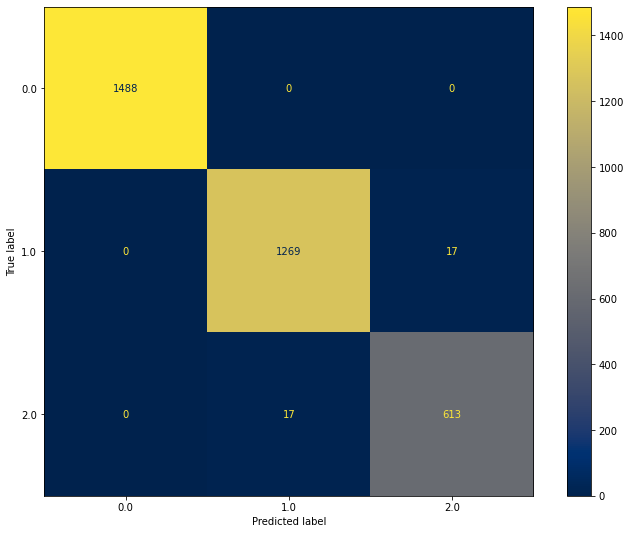

In [16]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree, X_test, y_test, cmap ='cividis', ax=ax)

And the accuracy as well as precision and recall value of our classifier is getting better now, as our classifier now achieve an accuracy of 99% after previously it was 94%. That means our classifier performs better when we let it decide the optimum number of the leaf nodes by itself. Although it seems good already, can we optimize it even more and achieve higher accuracy? Let's find out in the next section. 

### Random Forest Classifier

Random Forest can be called as an extension of Decision Tree Classifier because Random Forest is an algorithm that consists of a bunch of Decision Trees, ensembled into one algorithm. It uses bagging approach to randomly sampled training data points, which means that each Decision Tree is trained on different sets of training data. However, it is important to note that bagging uses a bootstrap method to sample data points. This means that a specific data point can be selected in accross Decision Trees more than once, i.e data point A can be selected as training instances in both Decision Tree A and Decision Tree C.

Below is the visualization of how Random Forest Classifier looks like:

![Imgur](https://i.imgur.com/9ghmtiW.png)

It is very easy to implement Random Forest algorithm with the help of Scikit-learn. Same as Decision Tree, there are hyperparameters value that we can tune in order to improve the performance of the algorithm, such as the number of Decision Tree Classifiers, maximum number of leaf nodes, maximum depth in each tree, etc. In the implementation below, we're going to implement Random Forest algorithm with the default value from Scikit-learn.

0.9908930669800236
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



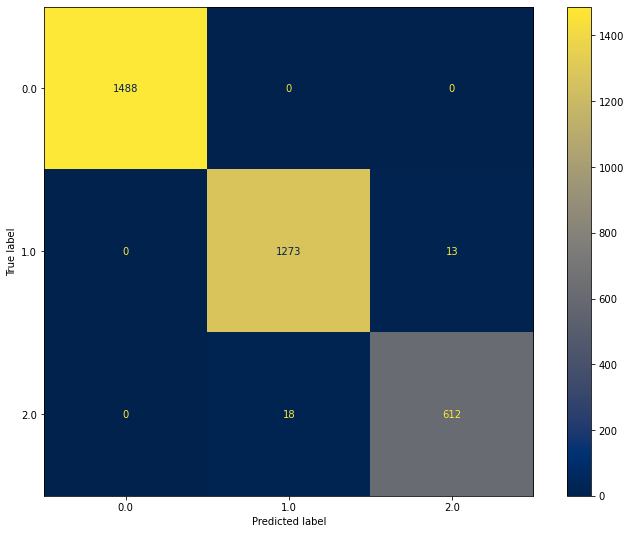

In [17]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
rf.fit(X_train, y_train)

# Predict test data with trained model
y_predict = rf.predict(X_test)

# Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, X_test, y_test, cmap ='cividis', ax=ax)

By looking at the accuracy and confusion matrix above, we can see that Random Forest algorithm slightly outperform a Decision Tree Classifier. This shows that an ensemble method like Random Forest can be powerful in most cases in comparison with a single classification algorithm.

Another interesting point with tree-based machine learning algorithm is that we can quantify the importance of each feature after we trained the model. This means that we can get information which feature is useful for the model to make prediction and which one is not. 

With Scikit-learn, we can find out the importance of each feature by calling `feature_importances_` method as follows:

runtime = 0.0061295693480302215
tomatometer_rating = 0.4751025864067028
tomatometer_count = 0.09895425717250429
audience_rating = 0.05389101976402856
audience_count = 0.016289896938110955
tomatometer_top_critics_count = 0.03605739578773787
tomatometer_fresh_critics_count = 0.14158242877024638
tomatometer_rotten_critics_count = 0.1314030539462201
G = 0.00029824734631526663
NC17 = 1.7090610669550172e-05
NR = 0.008710731204885382
PG = 0.0005762363713202383
PG-13 = 0.002531466583040527
R = 0.0022318936876928337
audience_status = 0.026224126062495294


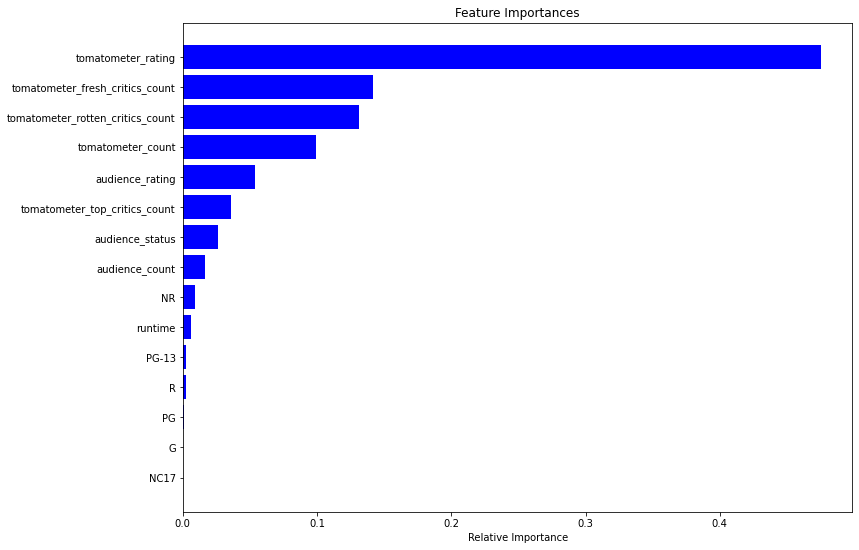

In [18]:
# Get the fature importance
feature_importance = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

It turns out that the variety of `content_rating` variables such as `NR`, `PG-13`, `R`, etc alongside with the `runtime` are not considered to be important by the model to make a prediction on unseen data points. Let's see whether we can improve the performance of our Random Forest classifier model by addressing this issue in the next section

### Random Forest Classifier with Feature Selection

As we have seen in the previous section,it turns out that several features are not considered to be important for our Random Forest model to make a prediction. Due to this reason, let's remove all of the features that have low importance for the model, such as `NR`, `runtime`, `PG-13`, `R`, `PG`, `G`, and `NC17`.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


Now with the new, more compact features, let's retrain our Random Forest classifier. This is an example of feature selection in a nutshell. We try to add/remove features to try to improve the performance of the model. Now let's see whether the performance of our Random Forest classifier will improve after feature selection.

0.9917743830787309
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



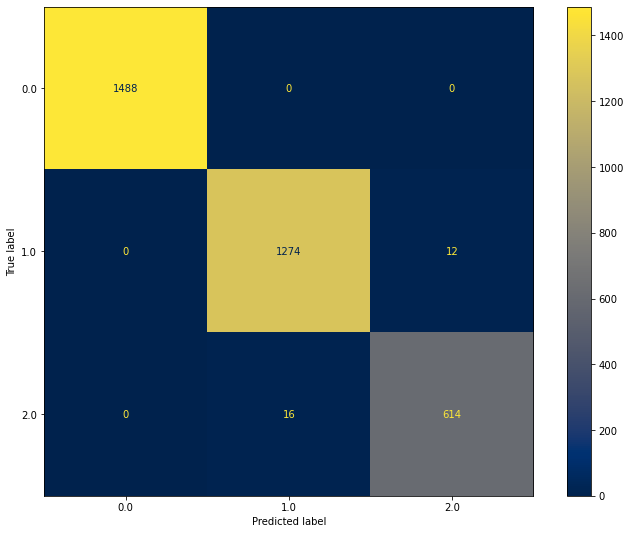

In [20]:
# Initialize Random Forest class
rf = RandomForestClassifier(random_state=2)

# Train Random Forest on the training data after feature selection
rf.fit(X_train, y_train)

# Predict the traind model on the test data after feature selection
y_predict = rf.predict(X_test)

# Print the accuracy score and the classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, X_test, y_test, cmap ='cividis', ax=ax)

And the performance of our model increased after feature selection. The accuracy of our model now reaches 99.1%. The False Positive and False Negative rate of our model prediction are also slightly decreased compared to the previous model. This proves that having more features doesn't equal to having a better model. In fact, some unimportant features might create a noise that negatively affect the reliability of model's prediction.

Now that our model reaches 91% accuracy, the question is: can we improve our model even more? Let's find out in the next section

### Weighted Random Forest Classifier with Feature Selection

Remember that in the Data Preprocessing section we mention that our label is slightly imbalanced? We have 3 distinct label values: 'Rotten' (denoted by 0), 'Fresh' (denoted by 1), and 'Certified-Fresh' (denoted by 2), with the distribution as follows:

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

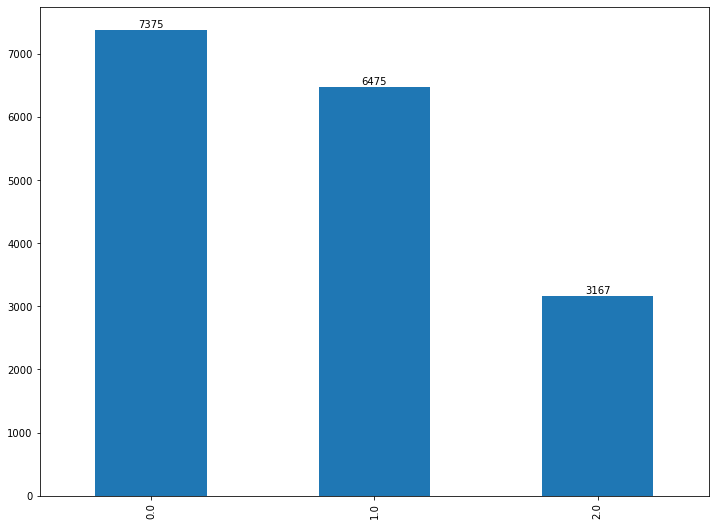

In [21]:
ax = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

Obviously the amount of data with 'Certified-Fresh' label is not comparable with the data with 'Rotten' label. We have a lot more data labeled as 'Rotten' compared to 'Certified-Fresh'. There are some methods that we can use to address this data imbalance issue, such as applying SMOTE algorithm to oversample the data which have less label, or we can supply the information about class weight to the model during the training process.

In this notebook, we're going to apply the second approach, in which we're going to apply class weight for each label. The idea behind it is that the class with less label will have a higher weight than the data with the more frequent label.

We can apply class weight with the help of scikit-learn by applying `compute_class_weight` method.

In [22]:
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature.tomatometer_status), 
                      y = df_feature.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

As you can see above, the class with the most data, i.e 0, or 'Rotten' has the smallest weight, while the class with the least data, i.e 2, or 'Certified-Fresh' has the biggest weight. Next, we can supply this weight information to the model when we initialize our Random Forest classifier. So let's initialize our model once more, now with class weight information, and then train it on the training set, use it to make a prediction on the test data, and finally print the accuracy score as well as the visualization of the confusion matrix.

0.9920681551116334
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



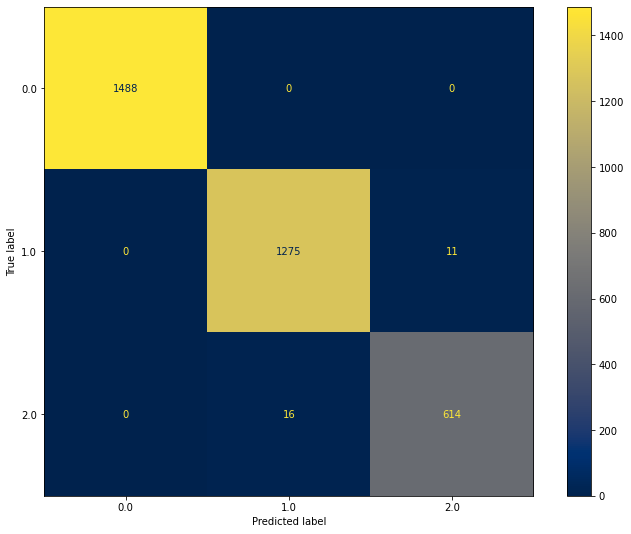

In [23]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

#Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

#Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, X_test, y_test, cmap ='cividis', ax=ax)

And it turns out that the performance of our model improved after applying class weights, as the accuracy now reaches 99.2% and the number of correct prediction of the data with 'Fresh' label is increased by one.

Applying class weight is the good way to deal with data imbalance problem, as it will make our model give more attention to the label with bigger weight during the training process.

## Second Approach: Predicting Movie Status Based on Review Sentiment

The second approach to predict the movie status is by conducting a so-called sentiment analysis, in which the model will predict the status of a movie based on the sentiment of a review. If the overall sentiment of a review is negative, then we can say that a movie can be classified as 'Rotten', otherwise 'Fresh'.

As we want our model to 'feel' the sentiment of a review, then we're dealing with text data as an input instead of numerical and categorical features as in the first approach. In this second approach, we're going to be using a different data, but we're still going to use strictly Random Forest for this task. Let's take a look at our data first.

In [84]:
df_critics = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


From the data above, we have the `review_content` variable, which is the input data that we will supply to our Decision Tree model, and `review_type` variable, which is the variable that our model will predict. 

However, notice that in our dataset above, we don't actually have the name of the movie for each review and also the corresponding movie status. What we do have is the `rotten_tomatoes_link`, which we also have in the previous dataset. If you still remember, in the `rotten_tomatoes_movies.csv` dataset, we have `movie_title` and `tomatometer_status` variables. Thus, in order to get the name of the corresponding movie for each review and also our target variable, then we can use `rotten_tomatoes_link` variable to merge the two dataframes.

In [85]:
df_merged = df_critics.merge(df_movie, how='inner', on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]

In [86]:
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


As previously mentioned, for this second approach we will only take the `review_content` as the input to our model during training process and use `review_type` as the ground truth label. Also, we need to filter out missing values in `review_content` feature as we can't work with the empty review. So let's filter out the missing value and take only `review_content` variable, as well as plot the distribution of `review_type` after filtering out the missing values.

In [87]:
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

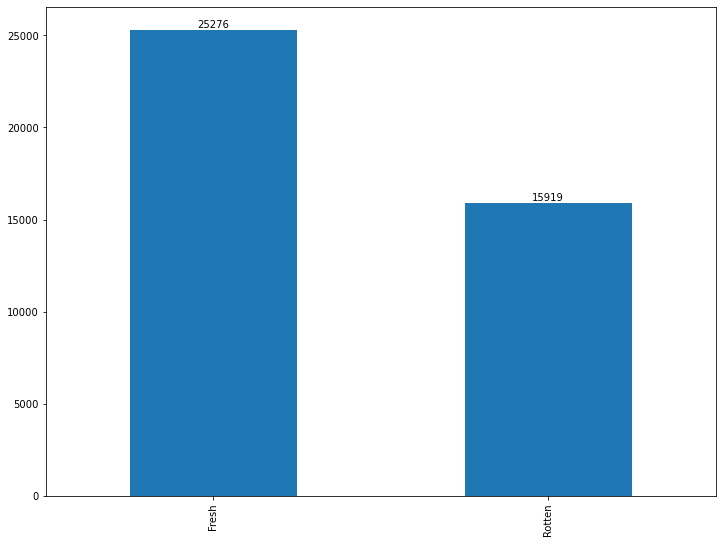

In [88]:
# Plot distribution of the review
ax = df_merged.review_type.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

As you can see from the visualization above, we have a pretty imbalanced distribution as well between our label. This means that it will be beneficial to add class weight information during the training process. From the visualization above as well, we know that we have more than 100k entries on our data. In the example throughout the rest of this notebook, we're going to use only a small fraction of them (5000 entries) to speed up training process. 

Also, what we're going to do is encode our label from string representation ('Rotten' or 'Fresh') to their integer representation (0 for 'Rotten' and 1 for 'Fresh') with ordinal encoding.

In [89]:
# Pick only 5000 entries from the original dataset
df_sub = df_merged[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten','Fresh'],[0,1]))

# Build final dataframe
df_feature_critics = pd.concat([df_sub[['review_content']]
                        ,review_type], axis=1).dropna()
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


Next, let's split our data into training data and test data.

In [90]:
X_train, X_test, y_train, y_test = train_test_split( df_feature_critics['review_content'], df_feature_critics['review_type'], test_size=0.2, random_state=42)

### Train Default Random Forest

From the content of our dataframe above, we know that each of our reviews is a string or collection of words. We need to convert them into a representation that can be used for machine learning algorithm to learn. To do this, normally we use a step called tokenization in Natural Language Processing, where we convert a text or a word into an **n**-dimensional vector, and then use this vector representation as the training data that we will supply to our machine learning algorithm.

We're going to use a similar concept for our data, in which we will convert the text review into a matrix of token counts. To better understand the concept, let's say we have two reviews:
1. "This movie is a good movie"
2. "The movie is bad"

the algorithm that we will use will take the two examples above and then build a dictionary out of those two examples, i.e a collection of unique words, such that we will get: **["this", "movie", "is", "a", "good", "the", "bad"]**

Next, the occurence of each word in our dictionary will be counted, depending on our input text. If our input text is "This movie is a good movie",then we get a vector of  **[1,  2, 1, 1, 1, 0, 0]**.

And finally we use the vector generated as the input data for our Random Forest model. The method explained above can be implemented easily with scikit-learn, especially with `CountVectorizer` class. After we vectorize our text, we train our Random Forest classifier.

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



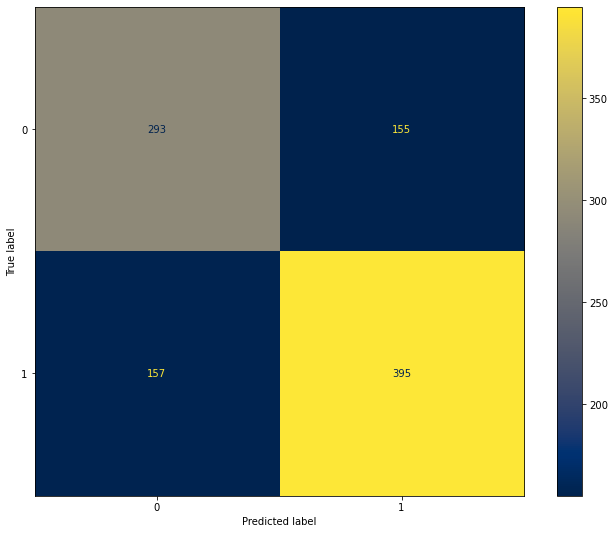

In [91]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf, vectorizer.transform(X_test).toarray(), y_test, cmap ='cividis', ax=ax)

### Train Weighted Random Forest

As you can see above, the performance of our model is not that good. However, this in some sense quite expected since we're working only with 5000 entries instead of 100000 entires. Let's check whether we can improve the performance of our model by including the weight, as we have seen previously that our label is quite imbalanced.

In [92]:
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df_feature_critics.review_type), 
                      y = df_feature_critics.review_type.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

Next, let's train the vectorized text data with our Random Forest classifier, this time with the additional information about class weight.

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       448
           1       0.76      0.66      0.71       552

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



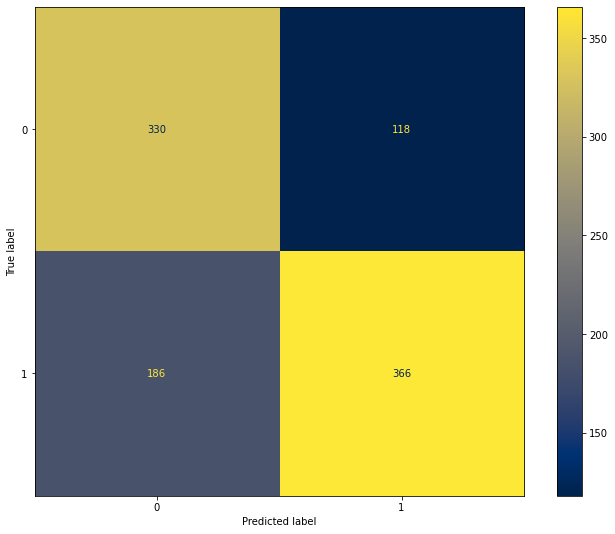

In [93]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf_weighted.predict(vectorizer.transform(X_test).toarray())

print(classification_report(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(rf_weighted, vectorizer.transform(X_test).toarray(), y_test, cmap ='cividis', ax=ax)

As you can see above, the overall accuracy of our model after the inclusion of class weight is slightly better than the one without. Also, notice that since the weight of class 0 ('Rotten') is higher than class 1 ('Fresh'), now the model performs better in predicting movie review classified as 'Rotten', but worse in predicting movie review classified as 'Fresh', as the model pays more attention to the data that are classified as 'Rotten'.

### Movie Status Prediction

Now that we have trained our Random Forest model to predict the sentiment of a movie review, let's use it to make some predictions on movie status. In order to classify a movie status, here's the step that we will do:

1. We gather all of the reviews from a particular movie
2. We use our Random Forest model to predict the status of each review (i.e 'Fresh' or 'Rotten')
3. We use the rule-based system described on Rotten Tomatoes website to classify the final status of a movie, based on the overall review status.

As mentioned before, Rotten Tomatoes classifies a movie as 'Fresh' if it receives at least 60% of positive reviews. Meanwhile, it classifies a movie as 'Rotten' if it receives less than 60% of positive reviews. 

Based on this rule, we first use our Random Forest model to predict the status of each review. Next, we sum the total number of reviews classified as 'Fresh' by the model, and then divide that number by the total number of reviews. If the result is above 60, then a movie will be classified as 'Fresh', otherwise 'Rotten'.

Let's create a function to compute the step described above.

In [94]:
def predict_movie_status(prediction):
    
    positive_percentage = (prediction == 1).sum()/len(prediction)*100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

In this example, we're going to predict the status of three different movies: Body of Lies, Angel Heart, and The Duchess. Let's start with Body of Lies.

#### 'Body of Lies' Prediction 

First, we gather all of the reviews associated with Body of Lies movie

In [95]:
# Gather all of the reviews of Body of Lies movie
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']

In [96]:
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


Now that we have gathered all of the reviews, next we use our Random Forest model to predict the status of each review. Then, we pass the model's prediction to the function we created above to predict the final status of the movie.

In [97]:
y_predicted_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicted_bol)

Positive review:51.96%
Movie status: Rotten


And there we have it. As the positive reviews predicted by the model only occupied just above 51% of the overall reviews, then Body of Lies is classified as 'Rotten'. To validate this, let's compare with the ground truth status of this movie.

In [98]:
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Body of Lies'].unique()

array(['Rotten'], dtype=object)

As you can see, the ground truth status of Body of Lies is 'Rotten', which is correctly predicted by our model in this case.

#### 'Angel Heart' Prediction

Same as the procedure that we did above, first we gather all of reviews that corresponds to Angel Heart. Then, we predict each of the reviews and compute the protion of the positive reviews predicted by the model.

In [99]:
# Gather all of the reviews of Anna Karenina movie
df_ah = df_merged.loc[df_merged['movie_title'] == 'Angel Heart']
df_ah.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh


In [100]:
y_predicted_ah = rf_weighted.predict(vectorizer.transform(df_ah['review_content']).toarray())
predict_movie_status(y_predicted_ah)

Positive review:61.11%
Movie status: Fresh


Since the portion of positive reviews occupy 61.1% of the total review, then Angel Heart is classified as 'Fresh' by our model. Now let's take a look at the ground truth label of this movie.

In [101]:
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Angel Heart'].unique()

array(['Fresh'], dtype=object)

And our model once again predicted the movie status correctly. Now let's move to the next movie, which is The Duchess

#### 'The Duchess' Prediction

In [102]:
# Gather all of the reviews of The Duchess movie 
df_duchess = df_merged.loc[df_merged['movie_title'] == 'The Duchess']
df_duchess.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
8558,m/10009493-duchess,The Duchess,For all its luscious period trappings and Keir...,Rotten,Fresh
8559,m/10009493-duchess,The Duchess,Solid but distant melodrama about the flamboya...,Fresh,Fresh
8560,m/10009493-duchess,The Duchess,"It could have been an intriguing, poignant sag...",Rotten,Fresh
8561,m/10009493-duchess,The Duchess,Has riveting parallels with much more recent B...,Fresh,Fresh
8562,m/10009493-duchess,The Duchess,Ralph Fiennes steals it as the dour duke in a ...,Fresh,Fresh


In [103]:
y_predicted_duchess = rf_weighted.predict(vectorizer.transform(df_duchess['review_content']).toarray())
predict_movie_status(y_predicted_duchess)

Positive review:59.51%
Movie status: Rotten


As you can see, our model predicted that the positive reviews occupy just below the threshold of 60%, thus the 'Rotten' prediction. Let's take a look at the ground truth label of this movie.

In [104]:
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'The Duchess'].unique()

array(['Fresh'], dtype=object)

And the grund-truth label of this movie is 'Fresh', which means that our model's prediction is wrong. However, it can be seen that the prediction from our model is very close to 60% threshold, which means that a slight improvement of the model could change its prediction from 'Rotten' to 'Fresh'. Obviously, the Random Forest that we have trained above is not the optimum model, as there are plenty of rooms for improvement. In the next section, we will give you several hints on how to improve the performance of our model.

### Performance Improvement Tips

The performance of our model above is still not optimal yet, as we definitely can improve the metrics score. We will leave that to you to play around with the code to improve the performance of our machine learning model. As a hint, there are at least 4 different ways that you can try to improve the performance of our model:

1. Train our random forest classifier model on more data, as we currently trained our model only with 5000 data
2. Tune the hyperparameter of random forest model such as the number of decision trees, maximum depth of each tree, etc
3. Train machine learning algorithms other than random forest on the same data, for example logistic regression, k-Nearest Neighbors, Support Vector Machine, or even Neural Networks
4. Change the approach to represent our text data. Currently, our approach is to build a vector of token counts and take a look if another approach, for example hashing vectorizer or TF-IDF vectorizer, performs better on our random forest model